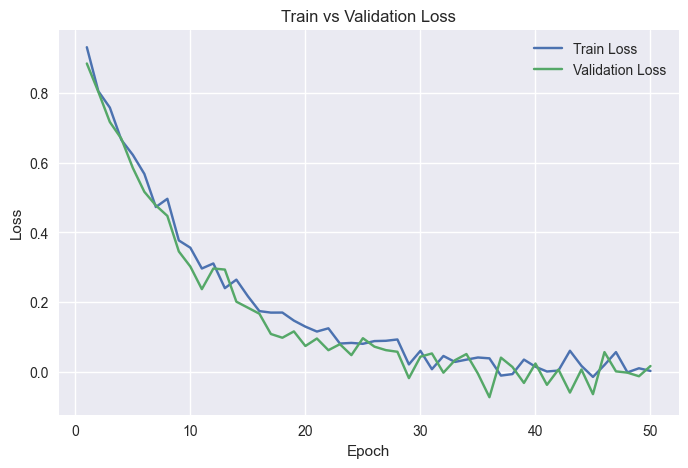

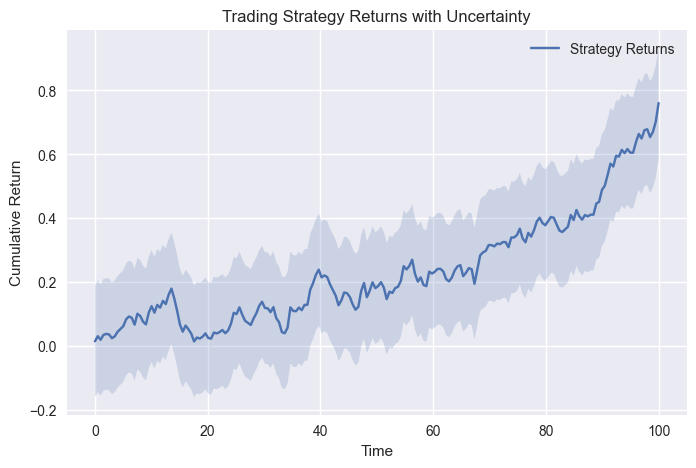

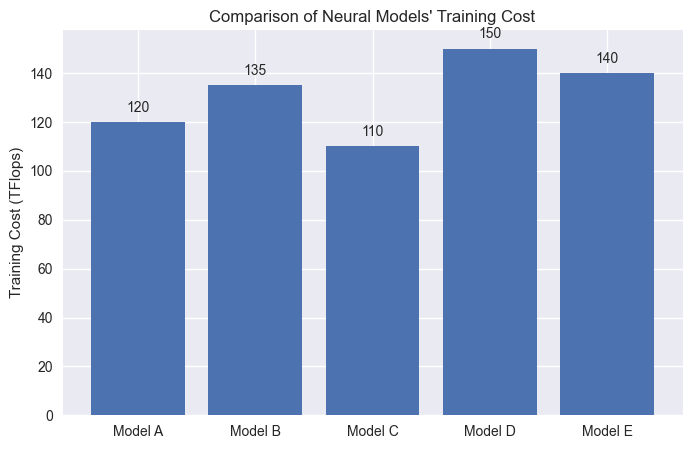

In [2]:
# plot_styleguide.ipynb

import numpy as np
import matplotlib.pyplot as plt

# Set general plotting style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8')



# Mock data
epochs = np.arange(1, 51)
train_loss = np.exp(-epochs/10) + np.random.normal(0, 0.02, size=50)
val_loss = np.exp(-epochs/9) + np.random.normal(0, 0.03, size=50)

# Train vs Validation Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

# Mock data for returns with uncertainty
time = np.linspace(0, 100, 200)
returns = np.cumsum(np.random.normal(0.001, 0.02, size=200))
uncertainty = np.std(returns) * np.ones_like(returns)

# Trading Strategy Returns Plot with Uncertainty
plt.figure(figsize=(8, 5))
plt.plot(time, returns, label='Strategy Returns')
plt.fill_between(time, returns - uncertainty, returns + uncertainty, alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title('Trading Strategy Returns with Uncertainty')
plt.legend()
plt.show()

# Mock data for model training cost
models = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E']
costs = [120, 135, 110, 150, 140]  # TFlops

# Clustered Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, costs)
ax.set_ylabel('Training Cost (TFlops)')
ax.set_title('Comparison of Neural Models\' Training Cost')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 3, f'{yval}', ha='center', va='bottom')

plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


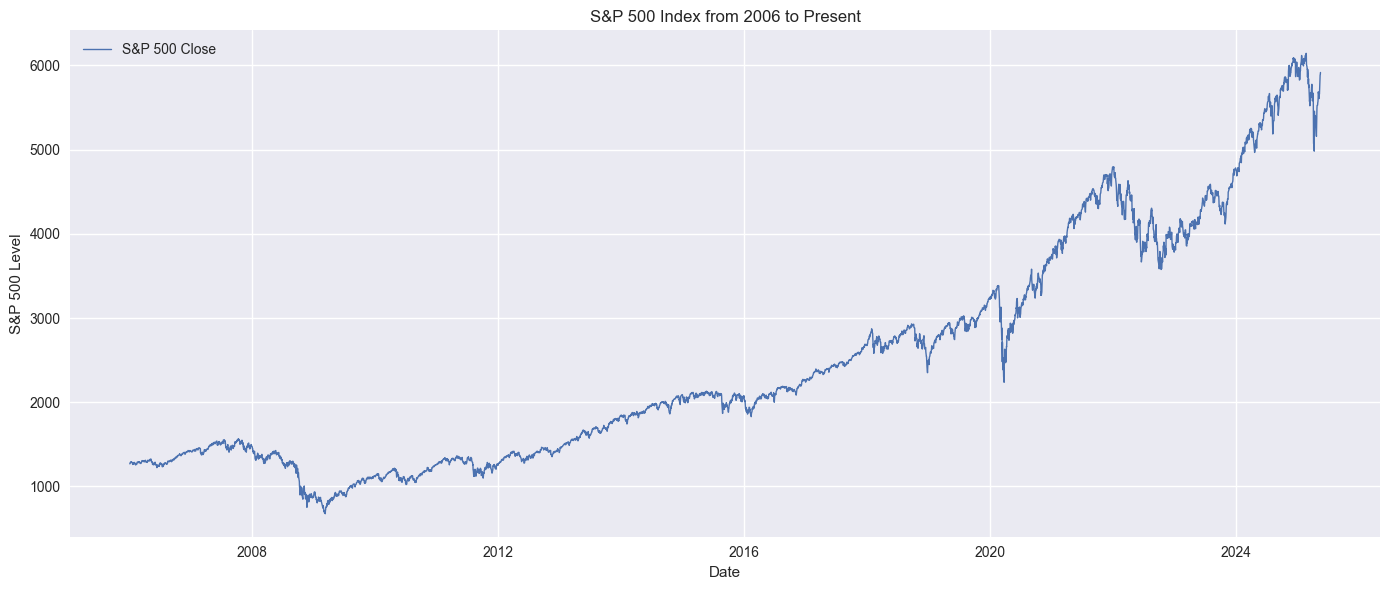

[*********************100%***********************]  1 of 1 completed


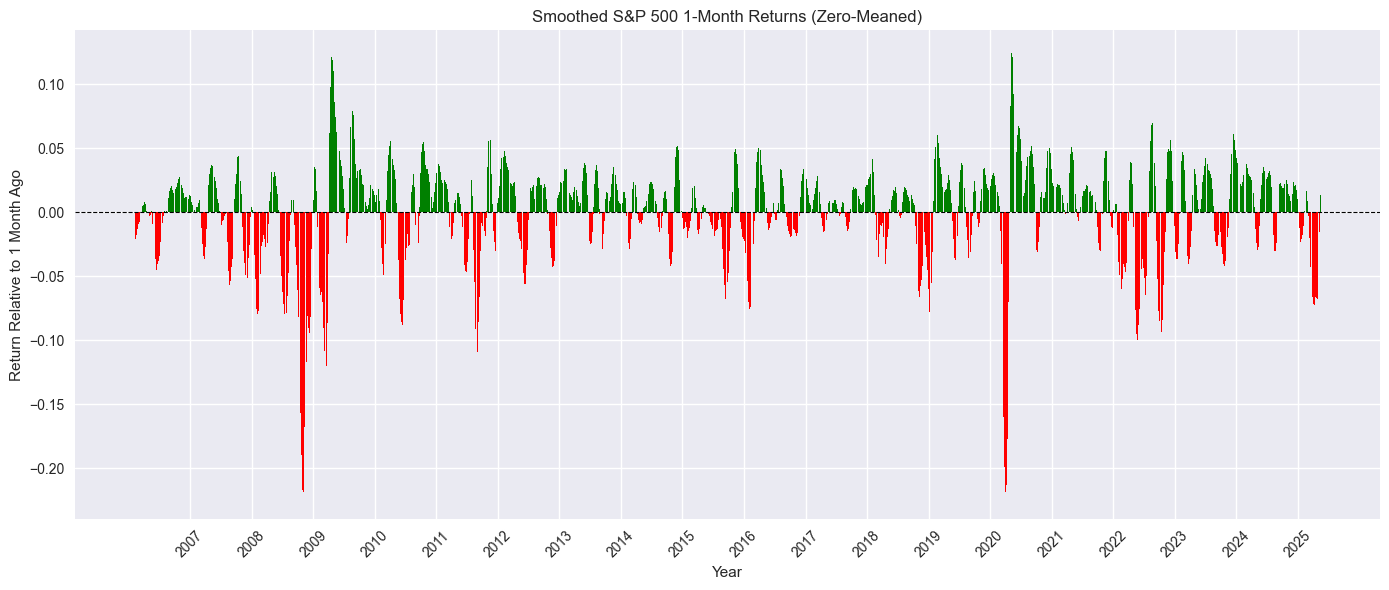

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch VIX data from Yahoo Finance
vix = yf.download("^VIX", start="2006-01-01")

# # Plot the closing price of VIX
# plt.figure(figsize=(14, 6))
# plt.plot(vix.index, vix['Close'], label='VIX Close', linewidth=1)
# plt.title("VIX (Volatility Index) from 2006 to Present")
# plt.xlabel("Date")
# plt.ylabel("VIX Level")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


# Fetch S&P 500 data from Yahoo Finance
sp500 = yf.download("^GSPC", start="2006-01-01")

# Plot the closing price of S&P 500
plt.figure(figsize=(14, 6))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close', linewidth=1)
plt.title("S&P 500 Index from 2006 to Present")
plt.xlabel("Date")
plt.ylabel("S&P 500 Level")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Fetch S&P 500 data from Yahoo Finance
sp500 = yf.download("^GSPC", start="2006-01-01")

# Calculate 1-month (21 trading days) return
sp500['1M_return'] = sp500['Close'] / sp500['Close'].shift(21) - 1

# Drop NA values
returns = sp500[['1M_return']].dropna()

# Apply smoothing with a rolling average (e.g., 10-day window)
returns['Smoothed'] = returns['1M_return'].rolling(window=20, min_periods=1).mean()

# Zero-mean the smoothed returns
returns['Zero_Meaned'] = returns['Smoothed'] - returns['Smoothed'].mean()

# Set color based on sign
colors = ['green' if val > 0 else 'red' for val in returns['Zero_Meaned']]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(returns.index, returns['Zero_Meaned'], color=colors, width=2)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Smoothed S&P 500 1-Month Returns (Zero-Meaned)")
plt.xlabel("Year")
plt.ylabel("Return Relative to 1 Month Ago")
plt.grid(True)

# Add yearly ticks on x-axis
years = pd.date_range(start=returns.index.min(), end=returns.index.max(), freq='YS')
plt.xticks(ticks=years, labels=[str(y.year) for y in years], rotation=45)

plt.tight_layout()
plt.show()